In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
# Select datetime and consumption columns from file
df2 = pd.read_csv("df.csv")
df2 = df2[["datetime", "consumption"]]
df2 = df2.rename(columns={"datetime": "ds", "consumption": "y"})

In [ ]:
# Select start point from date
df3 = df2[5424:]
df3

,ds,y
5424,2022-04-15 00:00:00,0.497
5425,2022-04-15 01:00:00,1.014
5426,2022-04-15 02:00:00,1.044
5427,2022-04-15 03:00:00,1.153
5428,2022-04-15 04:00:00,1.288
...,...,...
8587,2022-08-24 19:00:00,0.678
8588,2022-08-24 20:00:00,0.457
8589,2022-08-24 21:00:00,0.500
8590,2022-08-24 22:00:00,2.321


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bcrg642/the3f1d7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7bcrg642/sf0e7xgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34845', 'data', 'file=/tmp/tmp7bcrg642/the3f1d7.json', 'init=/tmp/tmp7bcrg642/sf0e7xgb.json', 'output', 'file=/tmp/tmp7bcrg642/prophet_modelsn5gq5s1/prophet_model-20221123084624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:46:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:46:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


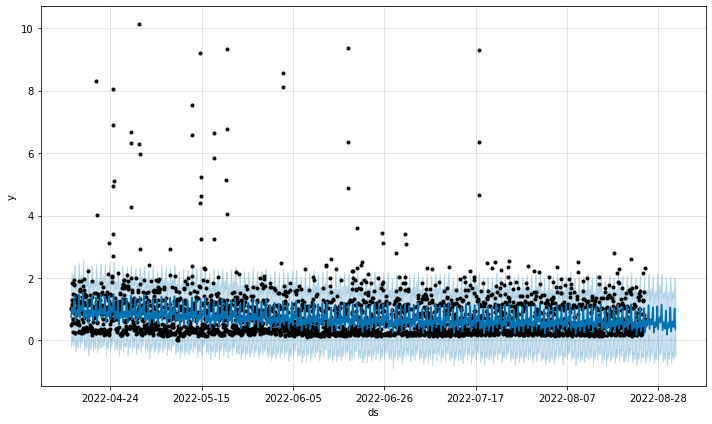

In [ ]:
# Apply Prophet model
m = Prophet(changepoint_prior_scale=0.01).fit(df3)
future = m.make_future_dataframe(periods=168, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)


In [ ]:
# Print predictions table
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-15 00:00:00,1.007241,-0.184806,1.734854,1.007241,1.007241,-0.264801,-0.264801,-0.264801,-0.339468,-0.339468,-0.339468,0.074668,0.074668,0.074668,0.0,0.0,0.0,0.742441
1,2022-04-15 01:00:00,1.007032,-0.190446,1.851194,1.007032,1.007032,-0.220100,-0.220100,-0.220100,-0.295630,-0.295630,-0.295630,0.075530,0.075530,0.075530,0.0,0.0,0.0,0.786932
2,2022-04-15 02:00:00,1.006823,-0.129745,1.868767,1.006823,1.006823,-0.084593,-0.084593,-0.084593,-0.160250,-0.160250,-0.160250,0.075657,0.075657,0.075657,0.0,0.0,0.0,0.922230
3,2022-04-15 03:00:00,1.006613,0.036785,2.070167,1.006613,1.006613,0.028509,0.028509,0.028509,-0.046533,-0.046533,-0.046533,0.075042,0.075042,0.075042,0.0,0.0,0.0,1.035123
4,2022-04-15 04:00:00,1.006404,0.119554,2.155594,1.006404,1.006404,0.042305,0.042305,0.042305,-0.031385,-0.031385,-0.031385,0.073689,0.073689,0.073689,0.0,0.0,0.0,1.048708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,2022-08-31 19:00:00,0.622734,-0.050202,2.009927,0.621683,0.623807,0.403981,0.403981,0.403981,0.447978,0.447978,0.447978,-0.043997,-0.043997,-0.043997,0.0,0.0,0.0,1.026714
3332,2022-08-31 20:00:00,0.622695,-0.056770,2.015542,0.621621,0.623776,0.351217,0.351217,0.351217,0.395471,0.395471,0.395471,-0.044254,-0.044254,-0.044254,0.0,0.0,0.0,0.973911
3333,2022-08-31 21:00:00,0.622655,-0.134154,1.849043,0.621573,0.623748,0.189601,0.189601,0.189601,0.233568,0.233568,0.233568,-0.043967,-0.043967,-0.043967,0.0,0.0,0.0,0.812256
3334,2022-08-31 22:00:00,0.622616,-0.326777,1.531935,0.621526,0.623723,-0.049035,-0.049035,-0.049035,-0.005919,-0.005919,-0.005919,-0.043116,-0.043116,-0.043116,0.0,0.0,0.0,0.573581


In [ ]:
# Add predictions to array
yhat = fcst['yhat']
yhat = yhat.to_numpy()
type(yhat)
ennustused = yhat[(len(yhat)-168):]

In [ ]:
# Add predictions to sample submission file
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission['consumption'] = ennustused
sample_submission.to_csv("prophet_from_midapril.csv")